###댐 유입 수량 예측을 통한 최적의 수량 예측 모형 도출
댐 수위 데이터를 활용하여 댐에 유입되는 수량을 예측하고, 최적의 댐 유입 수량 예측 모형 제시

##1.데이터 전처리

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import os
# import torch
# import torchvision
# import torch.nn

In [ ]:
torch.cuda.is_available() #빠른 연산을 위해서 gpu 사용해주기. 코랩환경 기준 런타임 -> 런타임 유형 변경에서 gpu on해놓고 gpu사용하는지 확인.

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
dam_raw = pd.read_excel('빅콘/dam_data.xlsx', encoding = 'utf-8', header = 1) #엑셀 파일 불러오기

In [4]:
dam_raw

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,유역평균강수,강우(A지역),강우(B지역),강우(C지역),...,강우(D지역).4,수위(E지역).4,수위(D지역).4,유역평균강수.5,강우(A지역).5,강우(B지역).5,강우(C지역).5,강우(D지역).5,수위(E지역).5,수위(D지역).5
0,1,2006,7,10,8,189.100000,6.4000,7,7,7,...,8,2.54,122.660,6.4000,7,7,8,8,2.54,122.610
1,1,2006,7,10,9,216.951962,6.3000,7,8,7,...,10,2.53,122.648,7.3000,7,8,10,10,2.53,122.600
2,1,2006,7,10,10,251.424419,6.4000,7,9,7,...,11,2.53,122.636,8.2000,7,9,10,11,2.53,122.590
3,1,2006,7,10,11,302.812199,7.3000,7,10,7,...,14,2.53,122.620,11.3000,9,10,15,14,2.53,122.585
4,1,2006,7,10,12,384.783406,8.2000,7,12,8,...,16,2.53,122.604,14.4000,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,26,2018,7,7,17,NaN,2.3689,1,0,0,...,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.950
3047,26,2018,7,7,18,NaN,2.3689,1,0,0,...,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.970
3048,26,2018,7,7,19,NaN,2.3689,1,0,0,...,0,3.13,129.940,2.0354,1,0,0,0,3.13,129.980
3049,26,2018,7,7,20,NaN,2.3689,1,0,0,...,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.990


In [5]:
dam_raw.columns #속성들 확인

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', '유역평균강수', '강우(A지역)', '강우(B지역)', '강우(C지역)', '강우(D지역)',
       '수위(E지역)', '수위(D지역)', '유역평균강수.1', '강우(A지역).1', '강우(B지역).1', '강우(C지역).1',
       '강우(D지역).1', '수위(E지역).1', '수위(D지역).1', '유역평균강수.2', '강우(A지역).2',
       '강우(B지역).2', '강우(C지역).2', '강우(D지역).2', '수위(E지역).2', '수위(D지역).2',
       '유역평균강수.3', '강우(A지역).3', '강우(B지역).3', '강우(C지역).3', '강우(D지역).3',
       '수위(E지역).3', '수위(D지역).3', '유역평균강수.4', '강우(A지역).4', '강우(B지역).4',
       '강우(C지역).4', '강우(D지역).4', '수위(E지역).4', '수위(D지역).4', '유역평균강수.5',
       '강우(A지역).5', '강우(B지역).5', '강우(C지역).5', '강우(D지역).5', '수위(E지역).5',
       '수위(D지역).5'],
      dtype='object')

In [6]:
dam_raw.rename(columns={'Unnamed: 0':'case_num', 'Unnamed: 1':'year', 'Unnamed: 2':'month','Unnamed: 3':'day','Unnamed: 4':'time','Unnamed: 5':'inflow'}, inplace=True) #속성 이름 변경

In [7]:
dam_raw

,case_num,year,month,day,time,inflow,유역평균강수,강우(A지역),강우(B지역),강우(C지역),...,강우(D지역).4,수위(E지역).4,수위(D지역).4,유역평균강수.5,강우(A지역).5,강우(B지역).5,강우(C지역).5,강우(D지역).5,수위(E지역).5,수위(D지역).5
0,1,2006,7,10,8,189.100000,6.4000,7,7,7,...,8,2.54,122.660,6.4000,7,7,8,8,2.54,122.610
1,1,2006,7,10,9,216.951962,6.3000,7,8,7,...,10,2.53,122.648,7.3000,7,8,10,10,2.53,122.600
2,1,2006,7,10,10,251.424419,6.4000,7,9,7,...,11,2.53,122.636,8.2000,7,9,10,11,2.53,122.590
3,1,2006,7,10,11,302.812199,7.3000,7,10,7,...,14,2.53,122.620,11.3000,9,10,15,14,2.53,122.585
4,1,2006,7,10,12,384.783406,8.2000,7,12,8,...,16,2.53,122.604,14.4000,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,26,2018,7,7,17,NaN,2.3689,1,0,0,...,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.950
3047,26,2018,7,7,18,NaN,2.3689,1,0,0,...,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.970
3048,26,2018,7,7,19,NaN,2.3689,1,0,0,...,0,3.13,129.940,2.0354,1,0,0,0,3.13,129.980
3049,26,2018,7,7,20,NaN,2.3689,1,0,0,...,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.990


In [8]:
dam_raw['time']

0        8
1        9
2       10
3       11
4       12
        ..
3046    17
3047    18
3048    19
3049    20
3050    21
Name: time, Length: 3051, dtype: int64

In [9]:
dam_raw['year'] = dam_raw['year'].astype(str)
dam_raw['month'] = dam_raw['month'].astype(str)
dam_raw['day'] = dam_raw['day'].astype(str)
dam_raw['time'] = dam_raw['time'].astype(int)

In [10]:
dam_raw['day'].isnull().sum() #na값 확인

0

In [11]:
dam_raw['month'].describe()

count     3051
unique       4
top          7
freq      2025
Name: month, dtype: object

In [12]:
#7월을 07월로 바꿔주는 작업
def add_zeros(dfcolname):
  fixed_col_li = []
  for i in dfcolname:
    if len(i) == 1:
      fixed_col = '0' + i
      fixed_col_li.append(fixed_col)
    else:
      fixed_col = i
      fixed_col_li.append(fixed_col)
  return fixed_col_li

In [13]:
dam_raw['month'] = add_zeros(dam_raw['month'])
dam_raw['day'] = add_zeros(dam_raw['day'])

In [14]:
ymd = dam_raw['year'] + dam_raw['month'] + dam_raw['day'] #날짜 합쳐주기

In [15]:
ymd

0       20060710
1       20060710
2       20060710
3       20060710
4       20060710
          ...   
3046    20180707
3047    20180707
3048    20180707
3049    20180707
3050    20180707
Length: 3051, dtype: object

In [16]:
dam_raw['datetime'] = pd.to_datetime(ymd) + pd.to_timedelta(dam_raw['time'],unit='h') #시간정보 datetime으로 바꿔주기

In [17]:
dam_raw

,case_num,year,month,day,time,inflow,유역평균강수,강우(A지역),강우(B지역),강우(C지역),...,수위(E지역).4,수위(D지역).4,유역평균강수.5,강우(A지역).5,강우(B지역).5,강우(C지역).5,강우(D지역).5,수위(E지역).5,수위(D지역).5,datetime
0,1,2006,07,10,8,189.100000,6.4000,7,7,7,...,2.54,122.660,6.4000,7,7,8,8,2.54,122.610,2006-07-10 08:00:00
1,1,2006,07,10,9,216.951962,6.3000,7,8,7,...,2.53,122.648,7.3000,7,8,10,10,2.53,122.600,2006-07-10 09:00:00
2,1,2006,07,10,10,251.424419,6.4000,7,9,7,...,2.53,122.636,8.2000,7,9,10,11,2.53,122.590,2006-07-10 10:00:00
3,1,2006,07,10,11,302.812199,7.3000,7,10,7,...,2.53,122.620,11.3000,9,10,15,14,2.53,122.585,2006-07-10 11:00:00
4,1,2006,07,10,12,384.783406,8.2000,7,12,8,...,2.53,122.604,14.4000,12,12,18,16,2.53,122.575,2006-07-10 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,26,2018,07,07,17,NaN,2.3689,1,0,0,...,3.16,129.916,2.1722,1,0,0,0,3.16,129.950,2018-07-07 17:00:00
3047,26,2018,07,07,18,NaN,2.3689,1,0,0,...,3.15,129.928,2.0805,1,0,0,0,3.15,129.970,2018-07-07 18:00:00
3048,26,2018,07,07,19,NaN,2.3689,1,0,0,...,3.13,129.940,2.0354,1,0,0,0,3.13,129.980,2018-07-07 19:00:00
3049,26,2018,07,07,20,NaN,2.3689,1,0,0,...,3.11,129.952,1.8993,1,0,0,0,3.11,129.990,2018-07-07 20:00:00


In [18]:
dam_raw.columns

Index(['case_num', 'year', 'month', 'day', 'time', 'inflow', '유역평균강수',
       '강우(A지역)', '강우(B지역)', '강우(C지역)', '강우(D지역)', '수위(E지역)', '수위(D지역)',
       '유역평균강수.1', '강우(A지역).1', '강우(B지역).1', '강우(C지역).1', '강우(D지역).1',
       '수위(E지역).1', '수위(D지역).1', '유역평균강수.2', '강우(A지역).2', '강우(B지역).2',
       '강우(C지역).2', '강우(D지역).2', '수위(E지역).2', '수위(D지역).2', '유역평균강수.3',
       '강우(A지역).3', '강우(B지역).3', '강우(C지역).3', '강우(D지역).3', '수위(E지역).3',
       '수위(D지역).3', '유역평균강수.4', '강우(A지역).4', '강우(B지역).4', '강우(C지역).4',
       '강우(D지역).4', '수위(E지역).4', '수위(D지역).4', '유역평균강수.5', '강우(A지역).5',
       '강우(B지역).5', '강우(C지역).5', '강우(D지역).5', '수위(E지역).5', '수위(D지역).5',
       'datetime'],
      dtype='object')

In [19]:
#속성 순서들 변경(맨뒤에 생성된 datetime컬럼 앞으로 가져오기)
dam_raw = dam_raw[['case_num', 'datetime', 'year', 'month', 'day', 'time', 'inflow', '유역평균강수',
       '강우(A지역)', '강우(B지역)', '강우(C지역)', '강우(D지역)', '수위(E지역)', '수위(D지역)',
       '유역평균강수.1', '강우(A지역).1', '강우(B지역).1', '강우(C지역).1', '강우(D지역).1',
       '수위(E지역).1', '수위(D지역).1', '유역평균강수.2', '강우(A지역).2', '강우(B지역).2',
       '강우(C지역).2', '강우(D지역).2', '수위(E지역).2', '수위(D지역).2', '유역평균강수.3',
       '강우(A지역).3', '강우(B지역).3', '강우(C지역).3', '강우(D지역).3', '수위(E지역).3',
       '수위(D지역).3', '유역평균강수.4', '강우(A지역).4', '강우(B지역).4', '강우(C지역).4',
       '강우(D지역).4', '수위(E지역).4', '수위(D지역).4', '유역평균강수.5', '강우(A지역).5',
       '강우(B지역).5', '강우(C지역).5', '강우(D지역).5', '수위(E지역).5', '수위(D지역).5',
       ]]

In [20]:
dam_raw

,case_num,datetime,year,month,day,time,inflow,유역평균강수,강우(A지역),강우(B지역),...,강우(D지역).4,수위(E지역).4,수위(D지역).4,유역평균강수.5,강우(A지역).5,강우(B지역).5,강우(C지역).5,강우(D지역).5,수위(E지역).5,수위(D지역).5
0,1,2006-07-10 08:00:00,2006,07,10,8,189.100000,6.4000,7,7,...,8,2.54,122.660,6.4000,7,7,8,8,2.54,122.610
1,1,2006-07-10 09:00:00,2006,07,10,9,216.951962,6.3000,7,8,...,10,2.53,122.648,7.3000,7,8,10,10,2.53,122.600
2,1,2006-07-10 10:00:00,2006,07,10,10,251.424419,6.4000,7,9,...,11,2.53,122.636,8.2000,7,9,10,11,2.53,122.590
3,1,2006-07-10 11:00:00,2006,07,10,11,302.812199,7.3000,7,10,...,14,2.53,122.620,11.3000,9,10,15,14,2.53,122.585
4,1,2006-07-10 12:00:00,2006,07,10,12,384.783406,8.2000,7,12,...,16,2.53,122.604,14.4000,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,26,2018-07-07 17:00:00,2018,07,07,17,NaN,2.3689,1,0,...,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.950
3047,26,2018-07-07 18:00:00,2018,07,07,18,NaN,2.3689,1,0,...,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.970
3048,26,2018-07-07 19:00:00,2018,07,07,19,NaN,2.3689,1,0,...,0,3.13,129.940,2.0354,1,0,0,0,3.13,129.980
3049,26,2018-07-07 20:00:00,2018,07,07,20,NaN,2.3689,1,0,...,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.990


In [21]:
dam_df_raw = dam_raw.drop(['year','month','day','time'],axis=1)
dam_df_raw

,case_num,datetime,inflow,유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),...,강우(D지역).4,수위(E지역).4,수위(D지역).4,유역평균강수.5,강우(A지역).5,강우(B지역).5,강우(C지역).5,강우(D지역).5,수위(E지역).5,수위(D지역).5
0,1,2006-07-10 08:00:00,189.100000,6.4000,7,7,7,8,2.54,122.56875,...,8,2.54,122.660,6.4000,7,7,8,8,2.54,122.610
1,1,2006-07-10 09:00:00,216.951962,6.3000,7,8,7,8,2.53,122.56250,...,10,2.53,122.648,7.3000,7,8,10,10,2.53,122.600
2,1,2006-07-10 10:00:00,251.424419,6.4000,7,9,7,8,2.53,122.55625,...,11,2.53,122.636,8.2000,7,9,10,11,2.53,122.590
3,1,2006-07-10 11:00:00,302.812199,7.3000,7,10,7,8,2.53,122.55625,...,14,2.53,122.620,11.3000,9,10,15,14,2.53,122.585
4,1,2006-07-10 12:00:00,384.783406,8.2000,7,12,8,10,2.53,122.55625,...,16,2.53,122.604,14.4000,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,26,2018-07-07 17:00:00,NaN,2.3689,1,0,0,0,3.16,129.99375,...,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.950
3047,26,2018-07-07 18:00:00,NaN,2.3689,1,0,0,0,3.15,130.00625,...,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.970
3048,26,2018-07-07 19:00:00,NaN,2.3689,1,0,0,0,3.13,130.01250,...,0,3.13,129.940,2.0354,1,0,0,0,3.13,129.980
3049,26,2018-07-07 20:00:00,NaN,2.3689,1,0,0,0,3.11,130.01875,...,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.990


In [22]:
dam_df = dam_df_raw[dam_df_raw['case_num'] < 26]
dam_df
#26번째 사상은 사용하지 않음

,case_num,datetime,inflow,유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),...,강우(D지역).4,수위(E지역).4,수위(D지역).4,유역평균강수.5,강우(A지역).5,강우(B지역).5,강우(C지역).5,강우(D지역).5,수위(E지역).5,수위(D지역).5
0,1,2006-07-10 08:00:00,189.100000,6.4000,7,7,7,8,2.54,122.56875,...,8,2.54,122.660,6.4000,7,7,8,8,2.54,122.610
1,1,2006-07-10 09:00:00,216.951962,6.3000,7,8,7,8,2.53,122.56250,...,10,2.53,122.648,7.3000,7,8,10,10,2.53,122.600
2,1,2006-07-10 10:00:00,251.424419,6.4000,7,9,7,8,2.53,122.55625,...,11,2.53,122.636,8.2000,7,9,10,11,2.53,122.590
3,1,2006-07-10 11:00:00,302.812199,7.3000,7,10,7,8,2.53,122.55625,...,14,2.53,122.620,11.3000,9,10,15,14,2.53,122.585
4,1,2006-07-10 12:00:00,384.783406,8.2000,7,12,8,10,2.53,122.55625,...,16,2.53,122.604,14.4000,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2886,25,2017-07-18 18:00:00,513.368437,22.7836,6,0,1,1,3.03,137.16875,...,1,3.03,137.088,1.7366,6,0,1,1,3.03,137.130
2887,25,2017-07-18 19:00:00,502.846843,8.2586,2,0,1,1,3.00,137.18125,...,1,3.00,137.104,1.7366,2,0,1,1,3.00,137.145
2888,25,2017-07-18 20:00:00,491.954805,4.1089,1,0,1,1,2.98,137.18750,...,1,2.98,137.120,1.7366,1,0,1,1,2.98,137.155
2889,25,2017-07-18 21:00:00,481.103083,3.3854,1,0,1,1,2.96,137.19375,...,1,2.96,137.136,1.7366,1,0,1,1,2.96,137.165


In [23]:
dam_df.isnull().sum()
#결측치 확인

case_num     0
datetime     0
inflow       0
유역평균강수       0
강우(A지역)      0
강우(B지역)      0
강우(C지역)      0
강우(D지역)      0
수위(E지역)      0
수위(D지역)      0
유역평균강수.1     0
강우(A지역).1    0
강우(B지역).1    0
강우(C지역).1    0
강우(D지역).1    0
수위(E지역).1    0
수위(D지역).1    0
유역평균강수.2     0
강우(A지역).2    0
강우(B지역).2    0
강우(C지역).2    0
강우(D지역).2    0
수위(E지역).2    0
수위(D지역).2    0
유역평균강수.3     0
강우(A지역).3    0
강우(B지역).3    0
강우(C지역).3    0
강우(D지역).3    0
수위(E지역).3    0
수위(D지역).3    0
유역평균강수.4     0
강우(A지역).4    0
강우(B지역).4    0
강우(C지역).4    0
강우(D지역).4    0
수위(E지역).4    0
수위(D지역).4    0
유역평균강수.5     0
강우(A지역).5    0
강우(B지역).5    0
강우(C지역).5    0
강우(D지역).5    0
수위(E지역).5    0
수위(D지역).5    0
dtype: int64

In [24]:
dam_df.index = dam_df['datetime'] #인덱스로 시간 지정
dam_df

,case_num,datetime,inflow,유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),...,강우(D지역).4,수위(E지역).4,수위(D지역).4,유역평균강수.5,강우(A지역).5,강우(B지역).5,강우(C지역).5,강우(D지역).5,수위(E지역).5,수위(D지역).5
datetime,,,,,,,,,,,,,,,,,,,,,
2006-07-10 08:00:00,1,2006-07-10 08:00:00,189.100000,6.4000,7,7,7,8,2.54,122.56875,...,8,2.54,122.660,6.4000,7,7,8,8,2.54,122.610
2006-07-10 09:00:00,1,2006-07-10 09:00:00,216.951962,6.3000,7,8,7,8,2.53,122.56250,...,10,2.53,122.648,7.3000,7,8,10,10,2.53,122.600
2006-07-10 10:00:00,1,2006-07-10 10:00:00,251.424419,6.4000,7,9,7,8,2.53,122.55625,...,11,2.53,122.636,8.2000,7,9,10,11,2.53,122.590
2006-07-10 11:00:00,1,2006-07-10 11:00:00,302.812199,7.3000,7,10,7,8,2.53,122.55625,...,14,2.53,122.620,11.3000,9,10,15,14,2.53,122.585
2006-07-10 12:00:00,1,2006-07-10 12:00:00,384.783406,8.2000,7,12,8,10,2.53,122.55625,...,16,2.53,122.604,14.4000,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-18 18:00:00,25,2017-07-18 18:00:00,513.368437,22.7836,6,0,1,1,3.03,137.16875,...,1,3.03,137.088,1.7366,6,0,1,1,3.03,137.130
2017-07-18 19:00:00,25,2017-07-18 19:00:00,502.846843,8.2586,2,0,1,1,3.00,137.18125,...,1,3.00,137.104,1.7366,2,0,1,1,3.00,137.145
2017-07-18 20:00:00,25,2017-07-18 20:00:00,491.954805,4.1089,1,0,1,1,2.98,137.18750,...,1,2.98,137.120,1.7366,1,0,1,1,2.98,137.155


In [25]:
Y_colname = ['inflow'] #종속변수
X_remove = ['datetime','case_num'] #사용하지 않을 속성들
X_colname = [x for x in dam_df.columns if x not in Y_colname + X_remove] #입력변수들
X_colname

['유역평균강수',
 '강우(A지역)',
 '강우(B지역)',
 '강우(C지역)',
 '강우(D지역)',
 '수위(E지역)',
 '수위(D지역)',
 '유역평균강수.1',
 '강우(A지역).1',
 '강우(B지역).1',
 '강우(C지역).1',
 '강우(D지역).1',
 '수위(E지역).1',
 '수위(D지역).1',
 '유역평균강수.2',
 '강우(A지역).2',
 '강우(B지역).2',
 '강우(C지역).2',
 '강우(D지역).2',
 '수위(E지역).2',
 '수위(D지역).2',
 '유역평균강수.3',
 '강우(A지역).3',
 '강우(B지역).3',
 '강우(C지역).3',
 '강우(D지역).3',
 '수위(E지역).3',
 '수위(D지역).3',
 '유역평균강수.4',
 '강우(A지역).4',
 '강우(B지역).4',
 '강우(C지역).4',
 '강우(D지역).4',
 '수위(E지역).4',
 '수위(D지역).4',
 '유역평균강수.5',
 '강우(A지역).5',
 '강우(B지역).5',
 '강우(C지역).5',
 '강우(D지역).5',
 '수위(E지역).5',
 '수위(D지역).5']

In [26]:
def datasplit(df, Y_colname, X_colname): #데이터 분리 함수
  df_train = df.loc[df['case_num'] < 18] #사건번호 18을 기준 전 후로 train test 로 분리하였음.
  df_test = df.loc[df['case_num'] >= 18]
  Y_train = df_train[Y_colname]
  X_train = df_train[X_colname]
  Y_test = df_test[Y_colname]
  X_test = df_test[X_colname]
  return X_train, X_test, Y_train, Y_test

In [27]:
X_train, X_test, Y_train, Y_test = datasplit(dam_df, Y_colname, X_colname) #데이터 분리

In [28]:
from sklearn import preprocessing

In [29]:
scaler_X_train = preprocessing.MinMaxScaler() #정확성을 높이기 위한 피쳐 스케일링
scaler_Y_train = preprocessing.MinMaxScaler() #X와 Y는 다른 스케일러 사용해야 함.

In [30]:
X_train_scaled = scaler_X_train.fit_transform(X_train) #피쳐 스케일링
Y_train_scaled = scaler_Y_train.fit_transform(Y_train)
X_test_scaled = scaler_X_train.transform(X_test) #test할 때는 train과는 달리 피팅하지않음. 이유는 테스트가 목적인데 train때 처럼 피팅을 하면 안되기 때문.
Y_test_scaled = scaler_Y_train.transform(Y_test)

In [31]:
print('X_train :', X_train.shape, 'Y_train :', Y_train.shape) #데이터 차원 확인 -> 현재는 2차원이지만 시간정보를 추가한 3차원 데이터로 만드는 것이 1차 목적. 즉 아직 데이터 전처리 완료되지 않음.
print('X_test :', X_test.shape, 'Y_test :', Y_test.shape)

X_train : (1773, 42) Y_train : (1773, 1)
X_test : (1118, 42) Y_test : (1118, 1)


In [32]:
X_train_scaled

array([[0.01948843, 0.02545455, 0.01907357, ..., 0.03065134, 0.04959786,
        0.10931937],
       [0.01918392, 0.02545455, 0.02179837, ..., 0.03831418, 0.04892761,
        0.10890052],
       [0.01948843, 0.02545455, 0.02452316, ..., 0.04214559, 0.04892761,
        0.10848168],
       ...,
       [0.02201553, 0.        , 0.        , ..., 0.04980843, 0.08914209,
        0.79706806],
       [0.02135566, 0.        , 0.        , ..., 0.04980843, 0.08780161,
        0.79581152],
       [0.02119062, 0.        , 0.        , ..., 0.04980843, 0.08646113,
        0.79434555]])

In [33]:
#차분을 정해서 얼마만큼의 차분으로 데이터를 사용해서 차분데이터를 추출하고, 기존데이터와 차분된 데이터를 함께 사용하여 다음 시간대의 데이터를 추출하는 작업. 즉 시간정보가 적용된 새로운 X,Y데이터로 분리
sequence = 7 #몇개의 입력데이터로 차분 데이터 생성할지에 대한 파라미터. 지금은 12라고 가정. 나중에 반복문을 통해 sequence 최적화가 필요할듯.
X_train, Y_train = [], []
for index in range(len(X_train_scaled) - sequence): #sequence개의 데이터만큼 차분데이터 분석에 사용하므로, 총 데이터 개수 - sequence개수가 전체 데이터의 길이 --> 총길이만큼 돌리는 것이므로, 기존 차원을 뜻하는 (row, column) 꼴에는 변함 없음 --> 2차원 데이터
  X_train.append(np.array(X_train_scaled[index:index + sequence])) #X_train 데이터 --> index가 sequence인 1차원 데이터 생성 --> sequence를 뜻하는 차원 생성
  Y_train.append(np.ravel(Y_train_scaled[index + sequence:index + sequence + 1])) #Y_train 데이터 --> index가 sequence인 1차원 데이터 생성 --> 그러나 ravel() 로 차원축소 --> sequence차원 생성되지 않음.
X_train, Y_train = np.array(X_train), np.array(Y_train) #array로 저장되어있는 리스트를 array로 변환해서 저장

In [34]:
X_test, Y_test = [], [] #동일한 과정 test데이터셋에도 적용
for index in range(len(X_test_scaled) - sequence):
  X_test.append(np.array(X_test_scaled[index:index + sequence])) 
  Y_test.append(np.ravel(Y_test_scaled[index + sequence:index + sequence + 1]))
X_test, Y_test = np.array(X_test), np.array(Y_test)

In [35]:
X_train.shape #입력변수가 3차원으로 잘 생성됨

(1766, 7, 42)

In [36]:
Y_train.shape #목표변수에는 sequence정보 필요 없음. 잘 생성됨.

(1766, 1)

In [37]:
print('X_train :', X_train.shape, 'Y_train :', Y_train.shape) #X/Y 분리가 잘 됨. 데이터 전처리 과정 완료
print('X_test :', X_test.shape, 'Y_test :', Y_test.shape)

X_train : (1766, 7, 42) Y_train : (1766, 1)
X_test : (1111, 7, 42) Y_test : (1111, 1)


##2.모델링 작업

In [38]:
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from keras.layers import LSTM, SimpleRNN, GRU
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [39]:
dropout_ratio = 0.2 #무작위로 버릴 데이터 비율
batch_size = 25 #미니 배치 내 데이터 수
epoch = 20 #돌릴 횟수

In [40]:
#모델 생성
model = Sequential()
model.add(LSTM(128, input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dropout(dropout_ratio))
model.add(Dense(1))
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 7, 128)            87552     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 7, 256)            394240    
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 256)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 7, 128)            197120    
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 128)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)               

In [41]:
model_fit = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch, verbose=1) #모델 피팅

Epoch 1/20
1766/1766 [==============================] - 8s 5ms/step - loss: 0.0087
Epoch 2/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0115
Epoch 3/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0054
Epoch 4/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0046
Epoch 5/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0061
Epoch 6/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0060
Epoch 7/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0040
Epoch 8/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0022
Epoch 9/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0021
Epoch 10/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0017
Epoch 11/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0015
Epoch 12/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0025
E

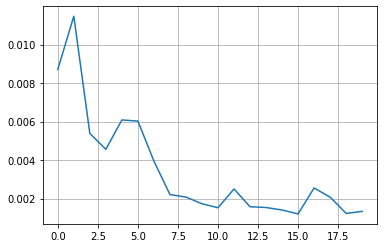

In [42]:
plt.plot(pd.DataFrame(model_fit.history)) #모델 피팅 결과 시각화
plt.grid(True)
plt.show()

In [43]:
Y_train_pred = model.predict(X_train) #예측 데이터 생성
Y_test_pred = model.predict(X_test)

##3.만든 모델 성능 평가

In [44]:
#딥러닝에 딱히 평가하는 함수가 없어서 만들어주기
#이번 댐 성능평가는 MSE사용한다고 함.
def evaluation(Y_real, Y_pred, graph_on=False):
    loss_length = len(Y_real.values.flatten()) - len(Y_pred)
    if loss_length != 0:
        Y_real = Y_real[loss_length:]
    if graph_on == True:
        pd.concat([Y_real, pd.DataFrame(Y_pred, index=Y_real.index, columns=['prediction'])], axis=1).plot(kind='line', figsize=(20,6),
                                                                                                           xlim=(Y_real.index.min(),Y_real.index.max()),
                                                                                                           linewidth=3, fontsize=20)
        plt.title('Time Series of Target', fontsize=20)
        plt.xlabel('Index', fontsize=15)
        plt.ylabel('Target Value', fontsize=15)
    MAE = abs(Y_real.values.flatten() - Y_pred).mean()
    MSE = ((Y_real.values.flatten() - Y_pred)**2).mean()
    MAPE = (abs(Y_real.values.flatten() - Y_pred)/Y_real.values.flatten()*100).mean()
    Score = pd.DataFrame([MAE, MSE, MAPE], index=['MAE', 'MSE', 'MAPE'], columns=['Score']).T
    Residual = pd.DataFrame(Y_real.values.flatten() - Y_pred, index=Y_real.index, columns=['Error'])
    return Score, Residual

In [45]:
def evaluation_trte(Y_real_tr, Y_pred_tr, Y_real_te, Y_pred_te, graph_on=False):
    Score_tr, Residual_tr = evaluation(Y_real_tr, Y_pred_tr, graph_on=graph_on)
    Score_te, Residual_te = evaluation(Y_real_te, Y_pred_te, graph_on=graph_on)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte, Residual_tr, Residual_te

1111/1111 [==============================] - 1s 1ms/step


,MAE,MSE,MAPE
Train,732.961768,1.297824e+06,69.369290
Test,424.310393,5.603920e+05,83.353806


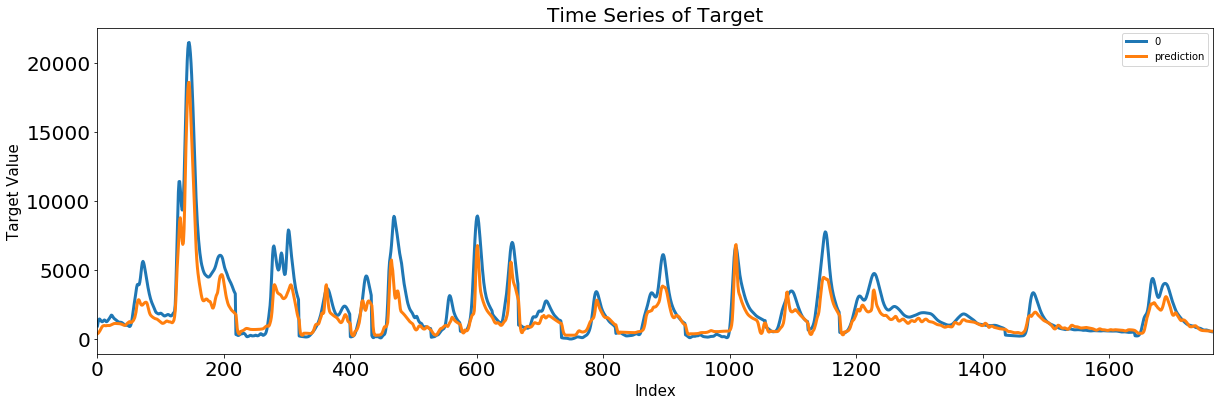

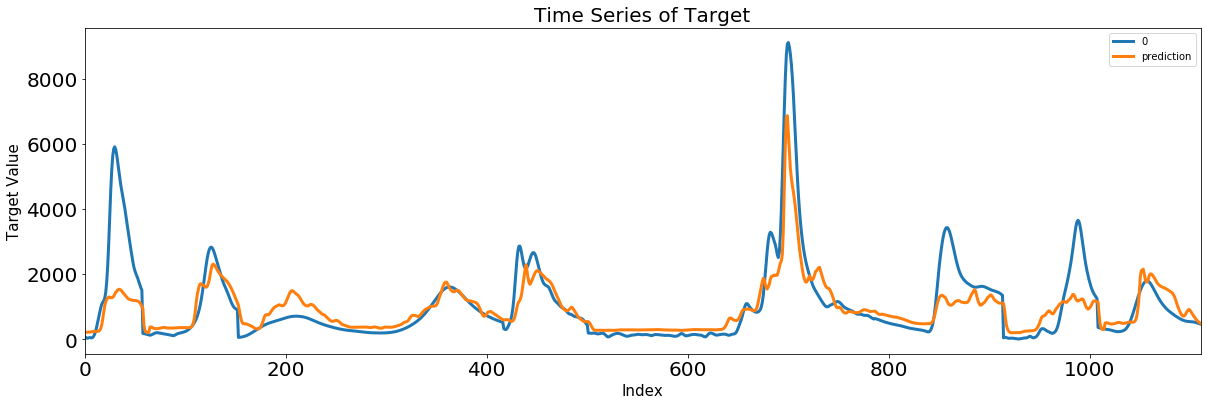

In [46]:
result = model.evaluate(X_test, Y_test_pred)
if scaler_Y_train != []:
    Y_train = scaler_Y_train.inverse_transform(Y_train)
    Y_train_pred = scaler_Y_train.inverse_transform(Y_train_pred)
    Y_test = scaler_Y_train.inverse_transform(Y_test)
    Y_test_pred = scaler_Y_train.inverse_transform(Y_test_pred)
Score_LSTM, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(), 
                                                      pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=True)
display(Score_LSTM)

##4.모델 사용하기

In [47]:
X_train.shape

(1766, 7, 42)

In [48]:
dam_df_raw

,case_num,datetime,inflow,유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),...,강우(D지역).4,수위(E지역).4,수위(D지역).4,유역평균강수.5,강우(A지역).5,강우(B지역).5,강우(C지역).5,강우(D지역).5,수위(E지역).5,수위(D지역).5
0,1,2006-07-10 08:00:00,189.100000,6.4000,7,7,7,8,2.54,122.56875,...,8,2.54,122.660,6.4000,7,7,8,8,2.54,122.610
1,1,2006-07-10 09:00:00,216.951962,6.3000,7,8,7,8,2.53,122.56250,...,10,2.53,122.648,7.3000,7,8,10,10,2.53,122.600
2,1,2006-07-10 10:00:00,251.424419,6.4000,7,9,7,8,2.53,122.55625,...,11,2.53,122.636,8.2000,7,9,10,11,2.53,122.590
3,1,2006-07-10 11:00:00,302.812199,7.3000,7,10,7,8,2.53,122.55625,...,14,2.53,122.620,11.3000,9,10,15,14,2.53,122.585
4,1,2006-07-10 12:00:00,384.783406,8.2000,7,12,8,10,2.53,122.55625,...,16,2.53,122.604,14.4000,12,12,18,16,2.53,122.575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,26,2018-07-07 17:00:00,NaN,2.3689,1,0,0,0,3.16,129.99375,...,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.950
3047,26,2018-07-07 18:00:00,NaN,2.3689,1,0,0,0,3.15,130.00625,...,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.970
3048,26,2018-07-07 19:00:00,NaN,2.3689,1,0,0,0,3.13,130.01250,...,0,3.13,129.940,2.0354,1,0,0,0,3.13,129.980
3049,26,2018-07-07 20:00:00,NaN,2.3689,1,0,0,0,3.11,130.01875,...,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.990


In [49]:
dam_test_df = dam_df_raw[dam_df_raw['case_num'] >= 26]
dam_test_df

,case_num,datetime,inflow,유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),...,강우(D지역).4,수위(E지역).4,수위(D지역).4,유역평균강수.5,강우(A지역).5,강우(B지역).5,강우(C지역).5,강우(D지역).5,수위(E지역).5,수위(D지역).5
2891,26,2018-07-01 06:00:00,NaN,14.2576,32,0,0,0,1.93,120.49375,...,0,1.93,120.528,0.8413,32,0,1,0,1.93,120.515
2892,26,2018-07-01 07:00:00,NaN,10.9657,20,1,0,0,1.93,120.48750,...,8,1.93,120.524,4.7653,21,1,14,8,1.93,120.510
2893,26,2018-07-01 08:00:00,NaN,7.9442,11,5,0,0,1.92,120.48125,...,24,1.92,120.520,12.9398,21,5,19,24,1.92,120.505
2894,26,2018-07-01 09:00:00,NaN,7.8916,3,11,0,0,1.92,120.47500,...,33,1.92,120.516,19.6616,18,11,22,33,1.92,120.500
2895,26,2018-07-01 10:00:00,NaN,13.3484,4,25,1,8,1.92,120.47500,...,36,1.92,120.512,26.6211,20,25,23,36,1.92,120.495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,26,2018-07-07 17:00:00,NaN,2.3689,1,0,0,0,3.16,129.99375,...,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.950
3047,26,2018-07-07 18:00:00,NaN,2.3689,1,0,0,0,3.15,130.00625,...,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.970
3048,26,2018-07-07 19:00:00,NaN,2.3689,1,0,0,0,3.13,130.01250,...,0,3.13,129.940,2.0354,1,0,0,0,3.13,129.980
3049,26,2018-07-07 20:00:00,NaN,2.3689,1,0,0,0,3.11,130.01875,...,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.990


In [50]:
X_hat = dam_test_df.iloc[:,3:]
X_hat

,유역평균강수,강우(A지역),강우(B지역),강우(C지역),강우(D지역),수위(E지역),수위(D지역),유역평균강수.1,강우(A지역).1,강우(B지역).1,...,강우(D지역).4,수위(E지역).4,수위(D지역).4,유역평균강수.5,강우(A지역).5,강우(B지역).5,강우(C지역).5,강우(D지역).5,수위(E지역).5,수위(D지역).5
2891,14.2576,32,0,0,0,1.93,120.49375,10.9657,32,0,...,0,1.93,120.528,0.8413,32,0,1,0,1.93,120.515
2892,10.9657,20,1,0,0,1.93,120.48750,7.9442,20,1,...,8,1.93,120.524,4.7653,21,1,14,8,1.93,120.510
2893,7.9442,11,5,0,0,1.92,120.48125,7.8916,12,5,...,24,1.92,120.520,12.9398,21,5,19,24,1.92,120.505
2894,7.8916,3,11,0,0,1.92,120.47500,13.3484,13,11,...,33,1.92,120.516,19.6616,18,11,22,33,1.92,120.500
2895,13.3484,4,25,1,8,1.92,120.47500,20.0760,18,25,...,36,1.92,120.512,26.6211,20,25,23,36,1.92,120.495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3046,2.3689,1,0,0,0,3.16,129.99375,2.3689,1,0,...,0,3.16,129.916,2.1722,1,0,0,0,3.16,129.950
3047,2.3689,1,0,0,0,3.15,130.00625,2.3689,1,0,...,0,3.15,129.928,2.0805,1,0,0,0,3.15,129.970
3048,2.3689,1,0,0,0,3.13,130.01250,2.3689,1,0,...,0,3.13,129.940,2.0354,1,0,0,0,3.13,129.980
3049,2.3689,1,0,0,0,3.11,130.01875,2.3689,1,0,...,0,3.11,129.952,1.8993,1,0,0,0,3.11,129.990


In [51]:
X_hat_scaled = scaler_X_train.transform(X_hat)

In [52]:
X_hat = []
for index in range(len(X_hat_scaled) - sequence):
  X_hat.append(np.array(X_hat_scaled[index:index + sequence])) 
X_hat = np.array(X_hat)

In [53]:
X_hat.shape

(153, 7, 42)

In [54]:
Y_hat = model.predict(X_hat)

In [55]:
Y_hat = scaler_Y_train.inverse_transform(Y_hat)
Y_hat

array([[ 389.62335],
       [ 466.93484],
       [ 532.12695],
       [ 553.4496 ],
       [ 544.3729 ],
       [ 550.3878 ],
       [ 605.0361 ],
       [ 699.5348 ],
       [ 811.17224],
       [ 920.77875],
       [1012.24536],
       [1036.95   ],
       [1003.681  ],
       [ 942.0928 ],
       [ 904.0768 ],
       [ 917.99615],
       [ 962.8612 ],
       [1022.0267 ],
       [1081.3391 ],
       [1131.6003 ],
       [1174.7452 ],
       [1216.0651 ],
       [1231.9116 ],
       [1211.6644 ],
       [1186.3135 ],
       [1182.9401 ],
       [1185.4746 ],
       [1176.3616 ],
       [1162.3407 ],
       [1162.5925 ],
       [1175.5631 ],
       [1185.422  ],
       [1185.1766 ],
       [1170.1688 ],
       [1142.5745 ],
       [1107.9896 ],
       [1072.3796 ],
       [1038.3535 ],
       [1002.28455],
       [ 971.88715],
       [ 947.5284 ],
       [ 929.4561 ],
       [ 919.0337 ],
       [ 922.0031 ],
       [ 938.07825],
       [ 950.075  ],
       [ 959.174  ],
       [ 951.

##5.파라미터 최적화

In [56]:
X_train_scaled

array([[0.01948843, 0.02545455, 0.01907357, ..., 0.03065134, 0.04959786,
        0.10931937],
       [0.01918392, 0.02545455, 0.02179837, ..., 0.03831418, 0.04892761,
        0.10890052],
       [0.01948843, 0.02545455, 0.02452316, ..., 0.04214559, 0.04892761,
        0.10848168],
       ...,
       [0.02201553, 0.        , 0.        , ..., 0.04980843, 0.08914209,
        0.79706806],
       [0.02135566, 0.        , 0.        , ..., 0.04980843, 0.08780161,
        0.79581152],
       [0.02119062, 0.        , 0.        , ..., 0.04980843, 0.08646113,
        0.79434555]])

In [57]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
Score = dict()
seqsize_list = [i for i in range(1, 20, 1)]
for i in tqdm(seqsize_list):
    sequence = i

    ## X / Y 분리
    X_train, Y_train = [], []
    for index in range(len(X_train_scaled) - sequence):
        X_train.append(np.array(X_train_scaled[index: index + sequence]))
        Y_train.append(np.ravel(Y_train_scaled[index + sequence:index + sequence + 1]))
    X_train, Y_train = np.array(X_train), np.array(Y_train)
    X_test, Y_test = [], []
    for index in range(len(X_test_scaled) - sequence):
        X_test.append(np.array(X_test_scaled[index: index + sequence]))
        Y_test.append(np.ravel(Y_test_scaled[index + sequence:index + sequence + 1]))  
    X_test, Y_test = np.array(X_test), np.array(Y_test) 

    # 형태확인
    X_train = X_train.reshape(X_train.shape[0], sequence, -1)
    X_test = X_test.reshape(X_test.shape[0], sequence, -1)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

    # 모델생성
    model2 = Sequential()
    model2.add(LSTM(128, input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
    model2.add(Dropout(dropout_ratio))
    model2.add(LSTM(256, return_sequences=True, activation='relu'))
    model2.add(Dropout(dropout_ratio))
    model2.add(LSTM(128, return_sequences=True, activation='relu'))
    model2.add(Dropout(dropout_ratio))
    model2.add(LSTM(64, return_sequences=False, activation='relu'))
    model2.add(Dropout(dropout_ratio))
    model2.add(Dense(1))
    model2.compile(optimizer='adam', loss = 'mean_squared_error')
    model2_fit = model2.fit(X_train, Y_train, 
                          batch_size=batch_size, epochs=epoch,
                          verbose=1)
    # 예측
    Y_train_pred = model2.predict(X_train)
    Y_test_pred = model2.predict(X_test)

    result = model2.evaluate(X_test, Y_test_pred)
    if scaler_Y_train != []:
        Y_train = scaler_Y_train.inverse_transform(Y_train)
        Y_train_pred = scaler_Y_train.inverse_transform(Y_train_pred)
        Y_test = scaler_Y_train.inverse_transform(Y_test)
        Y_test_pred = scaler_Y_train.inverse_transform(Y_test_pred)
    Score_LSTM, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(), 
                                                          pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=False)
    
    Score[str(sequence)] = Score_LSTM

  0%|                                                                                           | 0/19 [00:00<?, ?it/s]

X_train: (1772, 1, 42) Y_train: (1772, 1)
X_test: (1117, 1, 42) Y_test: (1117, 1)
Epoch 1/20
1772/1772 [==============================] - 5s 3ms/step - loss: 0.0110
Epoch 2/20
1772/1772 [==============================] - 1s 842us/step - loss: 0.0046
Epoch 3/20
1772/1772 [==============================] - 2s 856us/step - loss: 0.0037
Epoch 4/20
1772/1772 [==============================] - 2s 880us/step - loss: 0.0028
Epoch 5/20
1772/1772 [==============================] - 2s 854us/step - loss: 0.0026
Epoch 6/20
1772/1772 [==============================] - 2s 870us/step - loss: 0.0023
Epoch 7/20
1772/1772 [==============================] - 2s 877us/step - loss: 0.0025
Epoch 8/20
1772/1772 [==============================] - 2s 877us/step - loss: 0.0024
Epoch 9/20
1772/1772 [==============================] - 2s 849us/step - loss: 0.0026
Epoch 10/20
1772/1772 [==============================] - 2s 876us/step - loss: 0.0021
Epoch 11/20
1772/1772 [==============================] - 2s 877us/ste

  5%|████▎                                                                              | 1/19 [00:46<14:01, 46.77s/it]

X_train: (1771, 2, 42) Y_train: (1771, 1)
X_test: (1116, 2, 42) Y_test: (1116, 1)
Epoch 1/20
1771/1771 [==============================] - 5s 3ms/step - loss: 0.0090A:
Epoch 2/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.0051
Epoch 3/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.0035
Epoch 4/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.0029
Epoch 5/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.0024
Epoch 6/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.0025
Epoch 7/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.0034
Epoch 8/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.0019
Epoch 9/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.0019
Epoch 10/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.0017
Epoch 11/20
1771/1771 [==============================] - 2s 1ms/step - loss: 0.0017
E

 11%|████████▋                                                                          | 2/19 [01:46<14:23, 50.77s/it]

X_train: (1770, 3, 42) Y_train: (1770, 1)
X_test: (1115, 3, 42) Y_test: (1115, 1)
Epoch 1/20
1770/1770 [==============================] - 6s 4ms/step - loss: 0.0088
Epoch 2/20
1770/1770 [==============================] - 3s 2ms/step - loss: 0.0037
Epoch 3/20
1770/1770 [==============================] - 3s 2ms/step - loss: 0.0034
Epoch 4/20
1770/1770 [==============================] - 3s 2ms/step - loss: 0.0034
Epoch 5/20
1770/1770 [==============================] - 3s 2ms/step - loss: 0.0040
Epoch 6/20
1770/1770 [==============================] - 3s 2ms/step - loss: 0.0029
Epoch 7/20
1770/1770 [==============================] - 3s 2ms/step - loss: 0.0026
Epoch 8/20
1770/1770 [==============================] - 3s 2ms/step - loss: 0.0024
Epoch 9/20
1770/1770 [==============================] - 3s 2ms/step - loss: 0.0021
Epoch 10/20
1770/1770 [==============================] - 3s 2ms/step - loss: 0.0020
Epoch 11/20
1770/1770 [==============================] - 3s 2ms/step - loss: 0.0025
Epo

 16%|█████████████                                                                      | 3/19 [03:10<16:11, 60.70s/it]

X_train: (1769, 4, 42) Y_train: (1769, 1)
X_test: (1114, 4, 42) Y_test: (1114, 1)
Epoch 1/20
1769/1769 [==============================] - 7s 4ms/step - loss: 0.0090
Epoch 2/20
1769/1769 [==============================] - 4s 2ms/step - loss: 0.0044
Epoch 3/20
1769/1769 [==============================] - 4s 2ms/step - loss: 0.0049
Epoch 4/20
1769/1769 [==============================] - 4s 2ms/step - loss: 0.0030
Epoch 5/20
1769/1769 [==============================] - 4s 2ms/step - loss: 0.0050
Epoch 6/20
1769/1769 [==============================] - 4s 2ms/step - loss: 0.0035
Epoch 7/20
1769/1769 [==============================] - 4s 2ms/step - loss: 0.0037
Epoch 8/20
1769/1769 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 9/20
1769/1769 [==============================] - 4s 2ms/step - loss: 0.0026
Epoch 10/20
1769/1769 [==============================] - 4s 2ms/step - loss: 0.0022
Epoch 11/20
1769/1769 [==============================] - 4s 2ms/step - loss: 0.0025
Epo

 21%|█████████████████▍                                                                 | 4/19 [04:54<18:24, 73.65s/it]

X_train: (1768, 5, 42) Y_train: (1768, 1)
X_test: (1113, 5, 42) Y_test: (1113, 1)
Epoch 1/20
1768/1768 [==============================] - 8s 5ms/step - loss: 0.0080 - ETA: 0s - loss: 0.00
Epoch 2/20
1768/1768 [==============================] - 4s 2ms/step - loss: 0.0042A: 0s - lo
Epoch 3/20
1768/1768 [==============================] - 4s 2ms/step - loss: 0.0036A: 0s - loss: 0
Epoch 4/20
1768/1768 [==============================] - 4s 2ms/step - loss: 0.0043
Epoch 5/20
1768/1768 [==============================] - 4s 2ms/step - loss: 0.0055A: 0s - loss - ETA: 0s - loss
Epoch 6/20
1768/1768 [==============================] - 4s 2ms/step - loss: 0.0034A: 1s - loss: 0 - ETA:
Epoch 7/20
1768/1768 [==============================] - 4s 2ms/step - loss: 0.0033
Epoch 8/20
1768/1768 [==============================] - 4s 2ms/step - loss: 0.0021
Epoch 9/20
1768/1768 [==============================] - 4s 2ms/step - loss: 0.0019
Epoch 10/20
1768/1768 [==============================] - 4s 2ms/step - l

 26%|█████████████████████▊                                                             | 5/19 [06:55<20:27, 87.70s/it]

X_train: (1767, 6, 42) Y_train: (1767, 1)
X_test: (1112, 6, 42) Y_test: (1112, 1)
Epoch 1/20
1767/1767 [==============================] - 7s 4ms/step - loss: 0.0077
Epoch 2/20
1767/1767 [==============================] - 5s 3ms/step - loss: 0.0059
Epoch 3/20
1767/1767 [==============================] - 5s 3ms/step - loss: 0.0059
Epoch 4/20
1767/1767 [==============================] - 5s 3ms/step - loss: 0.0058
Epoch 5/20
1767/1767 [==============================] - 5s 3ms/step - loss: 0.0033
Epoch 6/20
1767/1767 [==============================] - 5s 3ms/step - loss: 0.0027
Epoch 7/20
1767/1767 [==============================] - 5s 3ms/step - loss: 0.0020
Epoch 8/20
1767/1767 [==============================] - 5s 3ms/step - loss: 0.0024
Epoch 9/20
1767/1767 [==============================] - 5s 3ms/step - loss: 0.0019
Epoch 10/20
1767/1767 [==============================] - 5s 3ms/step - loss: 0.0016
Epoch 11/20
1767/1767 [==============================] - 5s 3ms/step - loss: 0.0015
Epo

 32%|█████████████████████████▉                                                        | 6/19 [09:05<21:47, 100.59s/it]

X_train: (1766, 7, 42) Y_train: (1766, 1)
X_test: (1111, 7, 42) Y_test: (1111, 1)
Epoch 1/20
1766/1766 [==============================] - 9s 5ms/step - loss: 0.0081
Epoch 2/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0047
Epoch 3/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0075
Epoch 4/20
1766/1766 [==============================] - 6s 3ms/step - loss: 0.0059
Epoch 5/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0042
Epoch 6/20
1766/1766 [==============================] - 6s 3ms/step - loss: 0.0033
Epoch 7/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0034
Epoch 8/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0021
Epoch 9/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0019
Epoch 10/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0016
Epoch 11/20
1766/1766 [==============================] - 5s 3ms/step - loss: 0.0014
Epo

 37%|██████████████████████████████▏                                                   | 7/19 [11:34<23:01, 115.13s/it]

X_train: (1765, 8, 42) Y_train: (1765, 1)
X_test: (1110, 8, 42) Y_test: (1110, 1)
Epoch 1/20
1765/1765 [==============================] - 9s 5ms/step - loss: 0.0087
Epoch 2/20
1765/1765 [==============================] - 6s 3ms/step - loss: 0.0081A: 0s - loss: 0
Epoch 3/20
1765/1765 [==============================] - 6s 3ms/step - loss: 0.0059
Epoch 4/20
1765/1765 [==============================] - 6s 3ms/step - loss: 0.0063
Epoch 5/20
1765/1765 [==============================] - 6s 3ms/step - loss: 0.0034
Epoch 6/20
1765/1765 [==============================] - 6s 3ms/step - loss: 0.0028
Epoch 7/20
1765/1765 [==============================] - 6s 3ms/step - loss: 0.0026
Epoch 8/20
1765/1765 [==============================] - 6s 3ms/step - loss: 0.0026
Epoch 9/20
1765/1765 [==============================] - 6s 3ms/step - loss: 0.0048
Epoch 10/20
1765/1765 [==============================] - 6s 3ms/step - loss: 0.0016
Epoch 11/20
1765/1765 [==============================] - 6s 3ms/step - l

 42%|██████████████████████████████████▌                                               | 8/19 [14:17<23:42, 129.34s/it]

X_train: (1764, 9, 42) Y_train: (1764, 1)
X_test: (1109, 9, 42) Y_test: (1109, 1)
Epoch 1/20
1764/1764 [==============================] - 10s 6ms/step - loss: 0.0102
Epoch 2/20
1764/1764 [==============================] - 6s 4ms/step - loss: 0.0064
Epoch 3/20
1764/1764 [==============================] - 6s 4ms/step - loss: 0.0053
Epoch 4/20
1764/1764 [==============================] - 6s 4ms/step - loss: 0.0064
Epoch 5/20
1764/1764 [==============================] - 6s 4ms/step - loss: 0.0060
Epoch 6/20
1764/1764 [==============================] - 6s 4ms/step - loss: 0.0039A: - ETA: 3s -  - ETA: 2s - loss: 0
Epoch 7/20
1764/1764 [==============================] - 6s 4ms/step - loss: 0.0052
Epoch 8/20
1764/1764 [==============================] - 6s 4ms/step - loss: 0.0043
Epoch 9/20
1764/1764 [==============================] - 6s 4ms/step - loss: 0.0026- E - ETA: 0s - los
Epoch 10/20
1764/1764 [==============================] - 6s 4ms/step - loss: 0.0015
Epoch 11/20
1764/1764 [=========

 47%|██████████████████████████████████████▊                                           | 9/19 [17:14<23:56, 143.61s/it]

X_train: (1763, 10, 42) Y_train: (1763, 1)
X_test: (1108, 10, 42) Y_test: (1108, 1)
Epoch 1/20
1763/1763 [==============================] - 11s 6ms/step - loss: 0.0092
Epoch 2/20
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0079
Epoch 3/20
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0056
Epoch 4/20
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0116
Epoch 5/20
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0078
Epoch 6/20
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0060
Epoch 7/20
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0043
Epoch 8/20
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0027
Epoch 9/20
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0032
Epoch 10/20
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0018
Epoch 11/20
1763/1763 [==============================] - 7s 4ms/step - loss: 0.0015


 53%|██████████████████████████████████████████▋                                      | 10/19 [20:20<23:27, 156.42s/it]

X_train: (1762, 11, 42) Y_train: (1762, 1)
X_test: (1107, 11, 42) Y_test: (1107, 1)
Epoch 1/20
1762/1762 [==============================] - 11s 6ms/step - loss: 0.0084
Epoch 2/20
1762/1762 [==============================] - 7s 4ms/step - loss: 0.0068
Epoch 3/20
1762/1762 [==============================] - 7s 4ms/step - loss: 0.0046
Epoch 4/20
1762/1762 [==============================] - 7s 4ms/step - loss: 0.0068
Epoch 5/20
1762/1762 [==============================] - 7s 4ms/step - loss: 0.0035
Epoch 6/20
1762/1762 [==============================] - 7s 4ms/step - loss: 0.0021
Epoch 7/20
1762/1762 [==============================] - 7s 4ms/step - loss: 0.0026
Epoch 8/20
1762/1762 [==============================] - 7s 4ms/step - loss: 0.0019
Epoch 9/20
1762/1762 [==============================] - 7s 4ms/step - loss: 0.0016
Epoch 10/20
1762/1762 [==============================] - 7s 4ms/step - loss: 0.0014
Epoch 11/20
1762/1762 [==============================] - 7s 4ms/step - loss: 0.0012


 58%|██████████████████████████████████████████████▉                                  | 11/19 [23:39<22:33, 169.20s/it]

X_train: (1761, 12, 42) Y_train: (1761, 1)
X_test: (1106, 12, 42) Y_test: (1106, 1)
Epoch 1/20
1761/1761 [==============================] - 11s 6ms/step - loss: 0.0099
Epoch 2/20
1761/1761 [==============================] - 8s 4ms/step - loss: 0.0077
Epoch 3/20
1761/1761 [==============================] - 8s 4ms/step - loss: 0.0097
Epoch 4/20
1761/1761 [==============================] - 8s 4ms/step - loss: 0.0284
Epoch 5/20
1761/1761 [==============================] - 8s 4ms/step - loss: 0.0062
Epoch 6/20
1761/1761 [==============================] - 8s 4ms/step - loss: 0.0044
Epoch 7/20
1761/1761 [==============================] - 8s 4ms/step - loss: 0.0025
Epoch 8/20
1761/1761 [==============================] - 8s 4ms/step - loss: 0.0025
Epoch 9/20
1761/1761 [==============================] - 8s 4ms/step - loss: 0.0023
Epoch 10/20
1761/1761 [==============================] - 8s 4ms/step - loss: 0.0021
Epoch 11/20
1761/1761 [==============================] - 8s 4ms/step - loss: 0.0020


 63%|███████████████████████████████████████████████████▏                             | 12/19 [27:10<21:12, 181.74s/it]

X_train: (1760, 13, 42) Y_train: (1760, 1)
X_test: (1105, 13, 42) Y_test: (1105, 1)
Epoch 1/20
1760/1760 [==============================] - 12s 7ms/step - loss: 0.0093
Epoch 2/20
1760/1760 [==============================] - 9s 5ms/step - loss: 0.0070
Epoch 3/20
1760/1760 [==============================] - 9s 5ms/step - loss: 0.0062
Epoch 4/20
1760/1760 [==============================] - 9s 5ms/step - loss: 0.0049
Epoch 5/20
1760/1760 [==============================] - 9s 5ms/step - loss: 0.0050
Epoch 6/20
1760/1760 [==============================] - 9s 5ms/step - loss: 0.0024
Epoch 7/20
1760/1760 [==============================] - 9s 5ms/step - loss: 0.0020
Epoch 8/20
1760/1760 [==============================] - 9s 5ms/step - loss: 0.0019
Epoch 9/20
1760/1760 [==============================] - 9s 5ms/step - loss: 0.0017
Epoch 10/20
1760/1760 [==============================] - 9s 5ms/step - loss: 0.0013
Epoch 11/20
1760/1760 [==============================] - 9s 5ms/step - loss: 0.0014


 68%|███████████████████████████████████████████████████████▍                         | 13/19 [31:11<19:57, 199.62s/it]

X_train: (1759, 14, 42) Y_train: (1759, 1)
X_test: (1104, 14, 42) Y_test: (1104, 1)
Epoch 1/20
1759/1759 [==============================] - 13s 7ms/step - loss: 0.0084
Epoch 2/20
1759/1759 [==============================] - 9s 5ms/step - loss: 0.0121
Epoch 3/20
1759/1759 [==============================] - 9s 5ms/step - loss: 0.0088
Epoch 4/20
1759/1759 [==============================] - 9s 5ms/step - loss: 0.0054
Epoch 5/20
1759/1759 [==============================] - 9s 5ms/step - loss: 0.0042
Epoch 6/20
1759/1759 [==============================] - 9s 5ms/step - loss: 0.0026
Epoch 7/20
1759/1759 [==============================] - 9s 5ms/step - loss: 0.0022
Epoch 8/20
1759/1759 [==============================] - 9s 5ms/step - loss: 0.0021
Epoch 9/20
1759/1759 [==============================] - 9s 5ms/step - loss: 0.0020
Epoch 10/20
1759/1759 [==============================] - 9s 5ms/step - loss: 0.0017
Epoch 11/20
1759/1759 [==============================] - 9s 5ms/step - loss: 0.0015


 74%|███████████████████████████████████████████████████████████▋                     | 14/19 [35:24<17:57, 215.41s/it]

X_train: (1758, 15, 42) Y_train: (1758, 1)
X_test: (1103, 15, 42) Y_test: (1103, 1)
Epoch 1/20
1758/1758 [==============================] - 14s 8ms/step - loss: 0.0096
Epoch 2/20
1758/1758 [==============================] - 10s 6ms/step - loss: 0.0108
Epoch 3/20
1758/1758 [==============================] - 10s 6ms/step - loss: 0.0089
Epoch 4/20
1758/1758 [==============================] - 10s 6ms/step - loss: 0.0078
Epoch 5/20
1758/1758 [==============================] - 10s 6ms/step - loss: 0.0082
Epoch 6/20
1758/1758 [==============================] - 10s 6ms/step - loss: 0.0092
Epoch 7/20
1758/1758 [==============================] - 10s 6ms/step - loss: 0.0051
Epoch 8/20
1758/1758 [==============================] - 10s 6ms/step - loss: 0.0031
Epoch 9/20
1758/1758 [==============================] - 10s 6ms/step - loss: 0.0028
Epoch 10/20
1758/1758 [==============================] - 10s 6ms/step - loss: 0.0019
Epoch 11/20
1758/1758 [==============================] - 10s 6ms/step - los

 79%|███████████████████████████████████████████████████████████████▉                 | 15/19 [40:17<15:55, 238.91s/it]

X_train: (1757, 16, 42) Y_train: (1757, 1)
X_test: (1102, 16, 42) Y_test: (1102, 1)
Epoch 1/20
1757/1757 [==============================] - 15s 8ms/step - loss: 0.0101
Epoch 2/20
1757/1757 [==============================] - 11s 6ms/step - loss: 0.0086
Epoch 3/20
1757/1757 [==============================] - 11s 6ms/step - loss: 0.0056
Epoch 4/20
1757/1757 [==============================] - 11s 6ms/step - loss: 0.0047
Epoch 5/20
1757/1757 [==============================] - 11s 6ms/step - loss: 0.0028
Epoch 6/20
1757/1757 [==============================] - 11s 6ms/step - loss: 0.0040
Epoch 7/20
1757/1757 [==============================] - 11s 6ms/step - loss: 0.0017
Epoch 8/20
1757/1757 [==============================] - 10s 6ms/step - loss: 0.0018
Epoch 9/20
1757/1757 [==============================] - 11s 6ms/step - loss: 0.0017
Epoch 10/20
1757/1757 [==============================] - 11s 6ms/step - loss: 0.0018
Epoch 11/20
1757/1757 [==============================] - 11s 6ms/step - los

 84%|████████████████████████████████████████████████████████████████████▏            | 16/19 [45:09<12:44, 254.85s/it]

X_train: (1756, 17, 42) Y_train: (1756, 1)
X_test: (1101, 17, 42) Y_test: (1101, 1)
Epoch 1/20
1756/1756 [==============================] - 15s 9ms/step - loss: 0.0107
Epoch 2/20
1756/1756 [==============================] - 11s 6ms/step - loss: 0.0082
Epoch 3/20
1756/1756 [==============================] - 11s 6ms/step - loss: 0.0053
Epoch 4/20
1756/1756 [==============================] - 11s 6ms/step - loss: 0.0052
Epoch 5/20
1756/1756 [==============================] - 11s 6ms/step - loss: 0.0025
Epoch 6/20
1756/1756 [==============================] - 11s 6ms/step - loss: 0.0022
Epoch 7/20
1756/1756 [==============================] - 11s 6ms/step - loss: 0.0019
Epoch 8/20
1756/1756 [==============================] - 11s 6ms/step - loss: 0.0018
Epoch 9/20
1756/1756 [==============================] - 11s 6ms/step - loss: 0.0017
Epoch 10/20
1756/1756 [==============================] - 11s 6ms/step - loss: 0.0014
Epoch 11/20
1756/1756 [==============================] - 11s 6ms/step - los

In [ ]:
seq_test = pd.DataFrame()
for key, val in Score.items():
    seq_test = pd.concat([seq_test, val.iloc[1,:].T], axis=1)

seq_test = seq_test.T
seq_test.index = seqsize_list
seq_test['MSE'].plot(figsize=(12,4))
plt.show()

In [ ]:
Score = dict()
batchsize_list = [i for i in range(5, 50, 5)]
for i in tqdm(batchsize_list):
    batch_size = i

    ## X / Y 분리
    X_train, Y_train = [], []
    for index in range(len(X_train_scaled) - sequence):
        X_train.append(np.array(X_train_scaled[index: index + sequence]))
        Y_train.append(np.ravel(Y_train_scaled[index + sequence:index + sequence + 1]))
    X_train, Y_train = np.array(X_train), np.array(Y_train)
    X_test, Y_test = [], []
    for index in range(len(X_test_scaled) - sequence):
        X_test.append(np.array(X_test_scaled[index: index + sequence]))
        Y_test.append(np.ravel(Y_test_scaled[index + sequence:index + sequence + 1]))  
    X_test, Y_test = np.array(X_test), np.array(Y_test) 

    # 형태확인
    X_train = X_train.reshape(X_train.shape[0], sequence, -1)
    X_test = X_test.reshape(X_test.shape[0], sequence, -1)
    print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
    print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

    # 모델생성
    model3 = Sequential()
    model3.add(LSTM(128, input_shape = (X_train.shape[1], X_train.shape[2]), return_sequences=True, activation='relu'))
    model3.add(Dropout(dropout_ratio))
    model3.add(LSTM(256, return_sequences=True, activation='relu'))
    model3.add(Dropout(dropout_ratio))
    model3.add(LSTM(128, return_sequences=True, activation='relu'))
    model3.add(Dropout(dropout_ratio))
    model3.add(LSTM(64, return_sequences=False, activation='relu'))
    model3.add(Dropout(dropout_ratio))
    model3.add(Dense(1))
    model3.compile(optimizer='adam', loss = 'mean_squared_error')
    model3_fit = model3.fit(X_train, Y_train, 
                          batch_size=batch_size, epochs=epoch,
                          verbose=1)
    # 예측
    Y_train_pred = model3.predict(X_train)
    Y_test_pred = model3.predict(X_test)

    result = model3.evaluate(X_test, Y_test_pred)
    if scaler_Y_train != []:
        Y_train = scaler_Y_train.inverse_transform(Y_train)
        Y_train_pred = scaler_Y_train.inverse_transform(Y_train_pred)
        Y_test = scaler_Y_train.inverse_transform(Y_test)
        Y_test_pred = scaler_Y_train.inverse_transform(Y_test_pred)
    Score_LSTM, Residual_tr, Residual_te = evaluation_trte(pd.DataFrame(Y_train), Y_train_pred.flatten(), 
                                                          pd.DataFrame(Y_test), Y_test_pred.flatten(), graph_on=False)
    
    Score[str(batch_size)] = Score_LSTM

In [ ]:
   seq_test = pd.DataFrame()
for key, val in Score.items():
    seq_test = pd.concat([seq_test, val.iloc[1,:].T], axis=1)

seq_test = seq_test.T
seq_test.index = batchsize_list
seq_test['MSE'].plot(figsize=(12,4))
plt.show()

##6.결과 해석

sequence = 7, batch_size = 25 일때가 가장 좋은 성능을 보여준다는 것을 알 수 있다.

초기: sequence = 12, batch_size = 30

In [ ]:
import  